# **1. DATA UNDERSTANDING**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/loan_data_2007_2014.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-48-932e7f24b78f>:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/loan_data_2007_2014.csv')


In [ ]:
print(f"Jumlah baris: {data.shape[0]}")
print(f"Jumlah kolom: {data.shape[1]}")

Jumlah baris: 466285
Jumlah kolom: 75


In [ ]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
df_desc = data.apply(
    lambda col: [
        col.name,
        col.dtype,
        col.isnull().sum(),
        round((col.isnull().sum() / len(col)) * 100, 2),
        col.nunique(),
        list(col.drop_duplicates().sample(5, replace=True).values)
    ], axis=0
).T

df_desc.columns = ['Column', 'Dtype', 'null count', 'null perc.', 'unique count', 'unique sample']
df_desc

,Column,Dtype,null count,null perc.,unique count,unique sample
Unnamed: 0,Unnamed: 0,int64,0,0.0,466285,"[430866, 309826, 378615, 132357, 122709]"
id,id,int64,0,0.0,466285,"[10716399, 374720, 20809552, 13366825, 13066649]"
member_id,member_id,int64,0,0.0,466285,"[30945622, 9030497, 38640462, 35853856, 6207161]"
loan_amnt,loan_amnt,int64,0,0.0,1352,"[30500, 29000, 500, 34075, 32875]"
funded_amnt,funded_amnt,int64,0,0.0,1354,"[30325, 9650, 15250, 27550, 19700]"
...,...,...,...,...,...,...
all_util,all_util,float64,466285,100.0,0,"[nan, nan, nan, nan, nan]"
total_rev_hi_lim,total_rev_hi_lim,float64,70276,15.07,14612,"[27778.0, 36379.0, 54850.0, 138744.0, 14479.0]"
inq_fi,inq_fi,float64,466285,100.0,0,"[nan, nan, nan, nan, nan]"
total_cu_tl,total_cu_tl,float64,466285,100.0,0,"[nan, nan, nan, nan, nan]"


In [ ]:
null_values = data.isnull().sum()

# Menghitung total nilai null dan persentase
nvc = pd.DataFrame(null_values.sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values'] / data.shape[0]) * 100
nvc["Data Type"] = [data[col].dtype for col in data.columns]
nvc.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)

# Menampilkan hasil
nvc.style.background_gradient(cmap='Blues')

,Total Null Values,Percentage,Data Type
dti_joint,466285,100.000000,float64
annual_inc_joint,466285,100.000000,float64
open_acc_6m,466285,100.000000,float64
open_il_6m,466285,100.000000,float64
open_il_12m,466285,100.000000,float64
verification_status_joint,466285,100.000000,float64
open_il_24m,466285,100.000000,float64
mths_since_rcnt_il,466285,100.000000,float64
il_util,466285,100.000000,float64
total_bal_il,466285,100.000000,float64


In [ ]:
# Data insight
data.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [ ]:
# Menambahkan kolom 'risk_label' berdasarkan kondisi loan_status
data['risk_label'] = data['loan_status'].apply(
    lambda x: 'low risk' if x in ['Current', 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid'] else 'high risk'
)

# Menampilkan data untuk memastikan kolom baru telah ditambahkan
print(data[['loan_status', 'risk_label']].head())


   loan_status risk_label
0   Fully Paid   low risk
1  Charged Off  high risk
2   Fully Paid   low risk
3   Fully Paid   low risk
4      Current   low risk


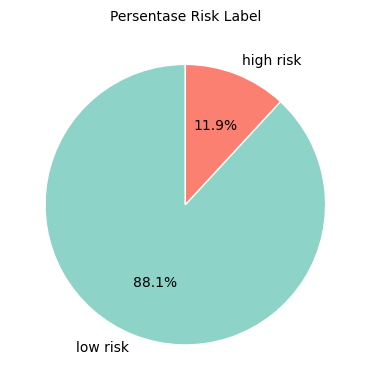

In [ ]:
# Hitung jumlah masing-masing kategori risk_label
risk_counts = data['risk_label'].value_counts()

# Pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    risk_counts,
    labels=risk_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#8dd3c7', '#fb8072'],
    wedgeprops={'edgecolor': 'white'}
)

plt.title('Persentase Risk Label', fontsize=10)
plt.tight_layout()
plt.show()


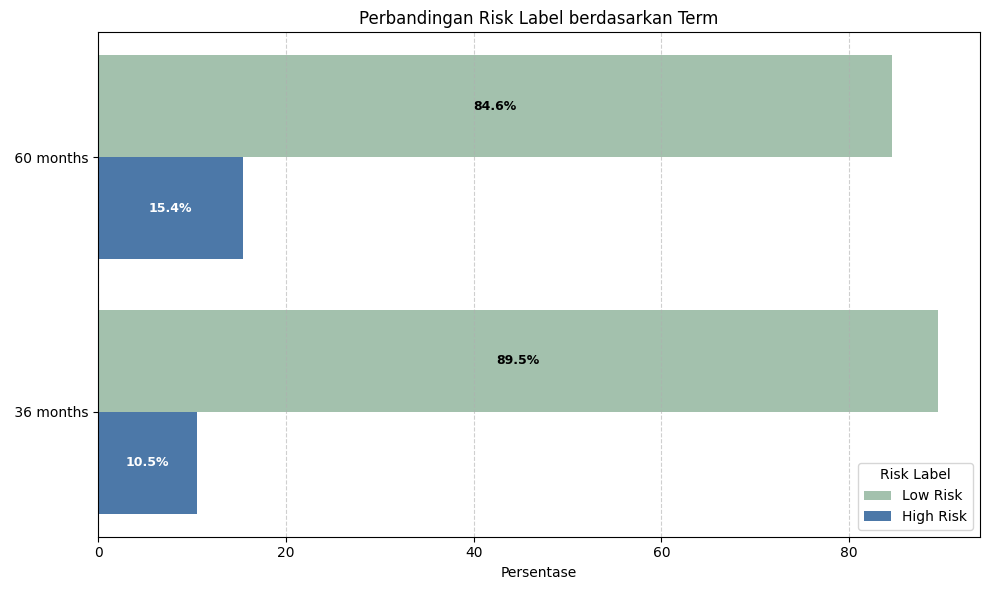

In [ ]:
# Hitung jumlah dan persentase
count_data = data.groupby(['term', 'risk_label']).size().reset_index(name='count')
count_data['percentage'] = count_data.groupby('term')['count'].transform(lambda x: x / x.sum() * 100)

# Pivot data
pivot = count_data.pivot(index='term', columns='risk_label', values='percentage').fillna(0)
terms = pivot.index
index = range(len(terms))
bar_height = 0.4

# Plot
plt.figure(figsize=(10, 6))
bars_low = plt.barh([i + bar_height/2 for i in index], pivot['low risk'], height=bar_height, label='Low Risk', color='#A3C1AD')
bars_high = plt.barh([i - bar_height/2 for i in index], pivot['high risk'], height=bar_height, label='High Risk', color='#4C78A8')

# Tambahkan persentase dalam bar
for bars, color in [(bars_low, 'black'), (bars_high, 'white')]:
    for bar in bars:
        width = bar.get_width()
        if width > 0:
            plt.text(width/2, bar.get_y() + bar.get_height()/2, f'{width:.1f}%',
                     ha='center', va='center', color=color, fontsize=9, fontweight='bold')

# Format plot
plt.yticks(index, terms)
plt.xlabel('Persentase')
plt.title('Perbandingan Risk Label berdasarkan Term')
plt.legend(title='Risk Label')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


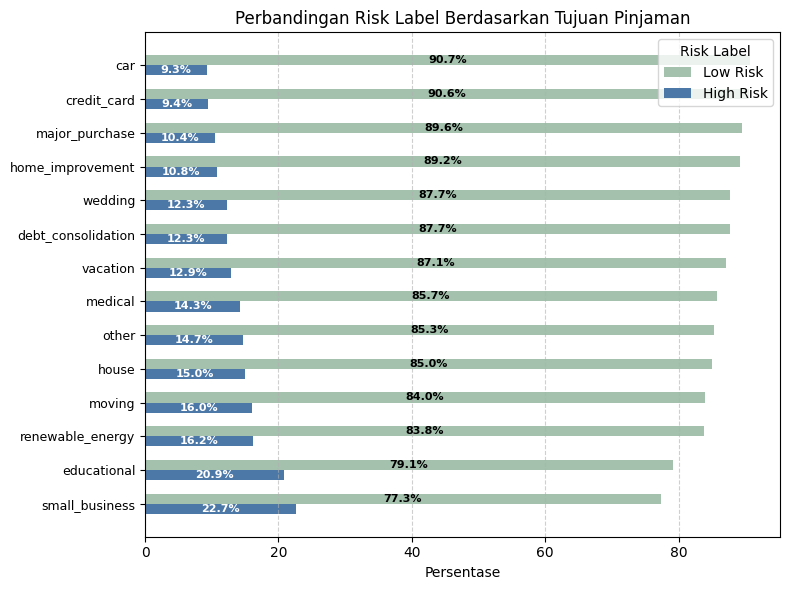

In [ ]:
# Hitung jumlah dan persentase
count_data = data.groupby(['purpose', 'risk_label']).size().reset_index(name='count')
count_data['percentage'] = count_data.groupby('purpose')['count'].transform(lambda x: x / x.sum() * 100)

# Pivot dan urutkan berdasarkan 'high risk'
pivot = count_data.pivot(index='purpose', columns='risk_label', values='percentage').fillna(0)
pivot = pivot.sort_values(by='high risk', ascending=False)

# Setup
purposes = pivot.index
index = range(len(purposes))
bar_height = 0.3  # lebih kecil dari sebelumnya

# Plot
plt.figure(figsize=(8, 6))  # lebih kecil dari 10x8
bars_low = plt.barh([i + bar_height/2 for i in index], pivot['low risk'], height=bar_height, label='Low Risk', color='#A3C1AD')
bars_high = plt.barh([i - bar_height/2 for i in index], pivot['high risk'], height=bar_height, label='High Risk', color='#4C78A8')

# Tambahkan label persentase
for bars, color in [(bars_low, 'black'), (bars_high, 'white')]:
    for bar in bars:
        width = bar.get_width()
        if width > 0:
            plt.text(width / 2, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%',
                     ha='center', va='center', color=color, fontsize=8, fontweight='bold')

# Format plot
plt.yticks(index, purposes, fontsize=9)
plt.xlabel('Persentase', fontsize=10)
plt.title('Perbandingan Risk Label Berdasarkan Tujuan Pinjaman', fontsize=12)
plt.legend(title='Risk Label')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


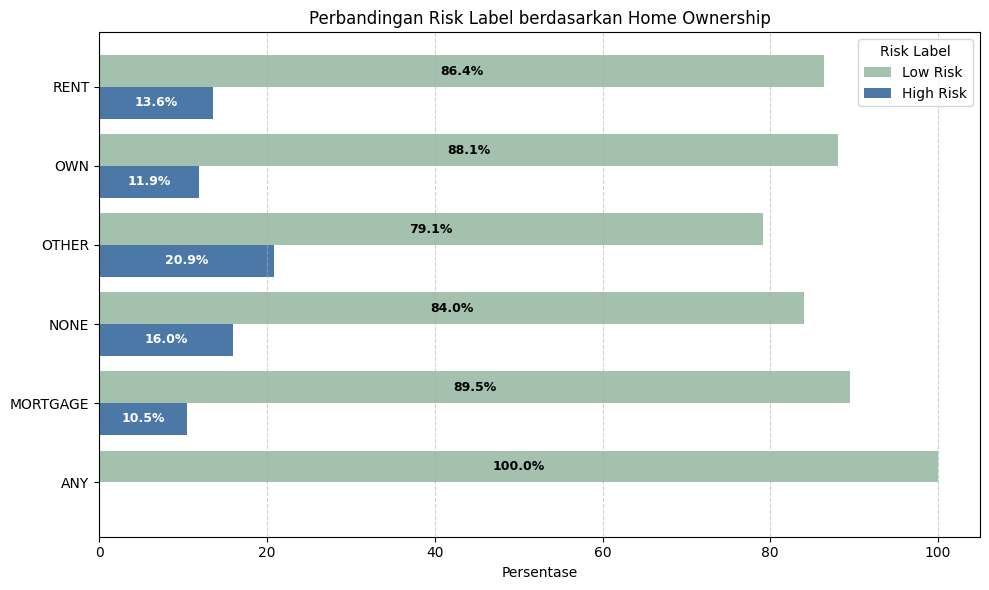

In [ ]:
# Hitung jumlah dan persentase
count_data = data.groupby(['home_ownership', 'risk_label']).size().reset_index(name='count')
count_data['percentage'] = count_data.groupby('home_ownership')['count'].transform(lambda x: x / x.sum() * 100)

# Pivot data
pivot = count_data.pivot(index='home_ownership', columns='risk_label', values='percentage').fillna(0)
ownerships = pivot.index
index = range(len(ownerships))
bar_height = 0.4

# Plot
plt.figure(figsize=(10, 6))
bars_low = plt.barh([i + bar_height/2 for i in index], pivot['low risk'], height=bar_height, label='Low Risk', color='#A3C1AD')
bars_high = plt.barh([i - bar_height/2 for i in index], pivot['high risk'], height=bar_height, label='High Risk', color='#4C78A8')

# Tambahkan persentase dalam bar
for bars, color in [(bars_low, 'black'), (bars_high, 'white')]:
    for bar in bars:
        width = bar.get_width()
        if width > 0:
            plt.text(width/2, bar.get_y() + bar.get_height()/2, f'{width:.1f}%',
                     ha='center', va='center', color=color, fontsize=9, fontweight='bold')

# Format plot
plt.yticks(index, ownerships)
plt.xlabel('Persentase')
plt.title('Perbandingan Risk Label berdasarkan Home Ownership')
plt.legend(title='Risk Label')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


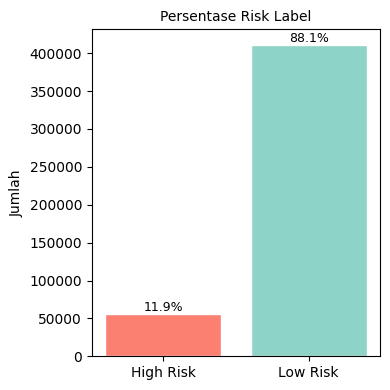

In [ ]:
# Hitung jumlah masing-masing kategori risk_label
risk_counts = data['risk_label'].value_counts().sort_index()
risk_labels = ['High Risk', 'Low Risk']
colors = ['#fb8072', '#8dd3c7']

# Bar chart
plt.figure(figsize=(4, 4))
bars = plt.bar(risk_labels, risk_counts.values, color=colors, edgecolor='white')

# Tambahkan persentase di atas bar
total = risk_counts.sum()
for bar, count in zip(bars, risk_counts.values):
    percentage = f'{(count / total) * 100:.1f}%'
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), percentage,
             ha='center', va='bottom', fontsize=9)

plt.title('Persentase Risk Label', fontsize=10)
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()


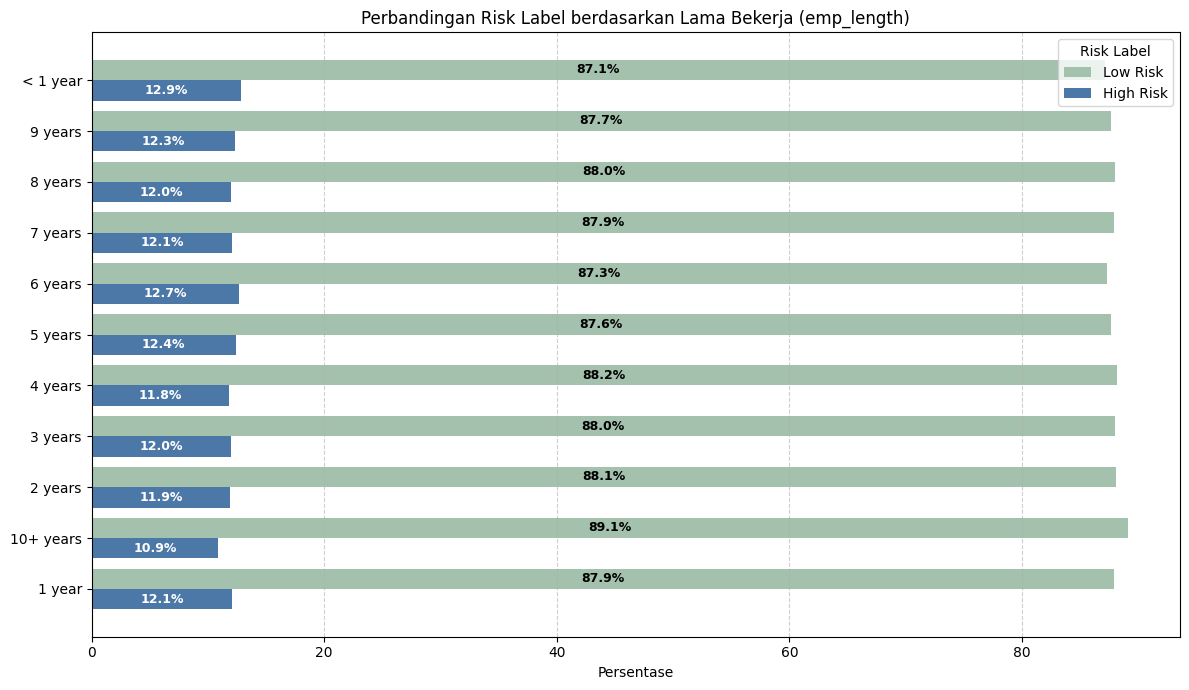

In [ ]:
# Hitung jumlah dan persentase berdasarkan emp_length dan risk_label
count_data = data.groupby(['emp_length', 'risk_label']).size().reset_index(name='count')
count_data['percentage'] = count_data.groupby('emp_length')['count'].transform(lambda x: x / x.sum() * 100)

# Pivot data
pivot = count_data.pivot(index='emp_length', columns='risk_label', values='percentage').fillna(0)
emp_lengths = pivot.index
index = range(len(emp_lengths))
bar_height = 0.4

# Plot
plt.figure(figsize=(12, 7))
bars_low = plt.barh([i + bar_height/2 for i in index], pivot['low risk'], height=bar_height, label='Low Risk', color='#A3C1AD')
bars_high = plt.barh([i - bar_height/2 for i in index], pivot['high risk'], height=bar_height, label='High Risk', color='#4C78A8')

# Tambahkan persentase di dalam bar
for bars, color in [(bars_low, 'black'), (bars_high, 'white')]:
    for bar in bars:
        width = bar.get_width()
        if width > 0:
            plt.text(width/2, bar.get_y() + bar.get_height()/2, f'{width:.1f}%',
                     ha='center', va='center', color=color, fontsize=9, fontweight='bold')

# Format plot
plt.yticks(index, emp_lengths)
plt.xlabel('Persentase')
plt.title('Perbandingan Risk Label berdasarkan Lama Bekerja (emp_length)')
plt.legend(title='Risk Label')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


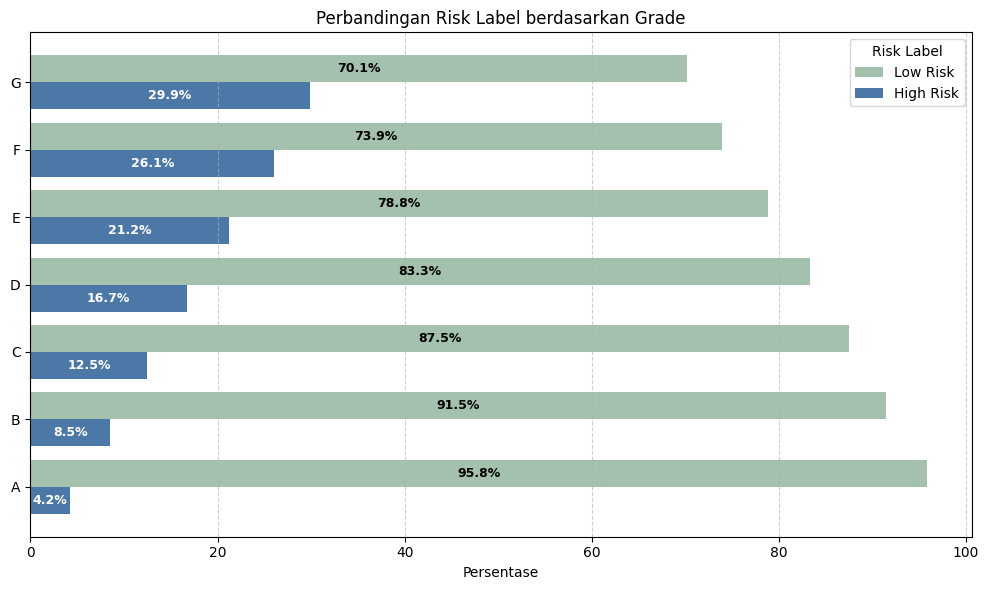

In [ ]:
# Hitung jumlah dan persentase berdasarkan grade dan risk_label
count_data = data.groupby(['grade', 'risk_label']).size().reset_index(name='count')
count_data['percentage'] = count_data.groupby('grade')['count'].transform(lambda x: x / x.sum() * 100)

# Pivot data
pivot = count_data.pivot(index='grade', columns='risk_label', values='percentage').fillna(0)

# Urutkan grade jika belum urut (A sampai G)
ordered_grades = sorted(pivot.index)
pivot = pivot.loc[ordered_grades]

grades = pivot.index
index = range(len(grades))
bar_height = 0.4

# Plot
plt.figure(figsize=(10, 6))
bars_low = plt.barh([i + bar_height/2 for i in index], pivot['low risk'], height=bar_height, label='Low Risk', color='#A3C1AD')
bars_high = plt.barh([i - bar_height/2 for i in index], pivot['high risk'], height=bar_height, label='High Risk', color='#4C78A8')

# Tambahkan persentase di dalam bar
for bars, color in [(bars_low, 'black'), (bars_high, 'white')]:
    for bar in bars:
        width = bar.get_width()
        if width > 0:
            plt.text(width/2, bar.get_y() + bar.get_height()/2, f'{width:.1f}%',
                     ha='center', va='center', color=color, fontsize=9, fontweight='bold')

# Format plot
plt.yticks(index, grades)
plt.xlabel('Persentase')
plt.title('Perbandingan Risk Label berdasarkan Grade')
plt.legend(title='Risk Label')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


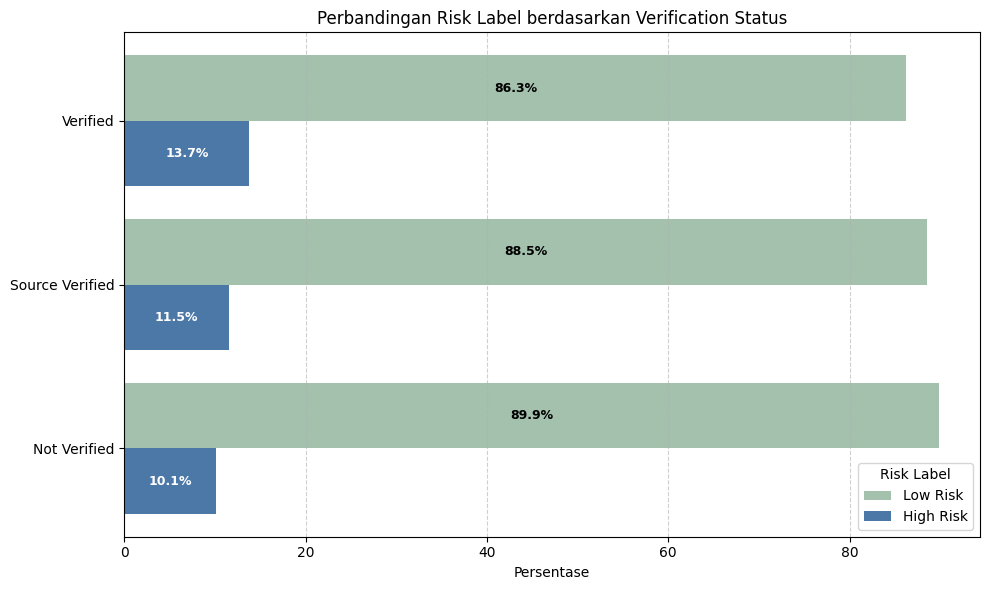

In [ ]:
# Hitung jumlah dan persentase berdasarkan verification_status dan risk_label
count_data = data.groupby(['verification_status', 'risk_label']).size().reset_index(name='count')
count_data['percentage'] = count_data.groupby('verification_status')['count'].transform(lambda x: x / x.sum() * 100)

# Pivot data
pivot = count_data.pivot(index='verification_status', columns='risk_label', values='percentage').fillna(0)

statuses = pivot.index
index = range(len(statuses))
bar_height = 0.4

# Plot
plt.figure(figsize=(10, 6))
bars_low = plt.barh([i + bar_height/2 for i in index], pivot['low risk'], height=bar_height, label='Low Risk', color='#A3C1AD')
bars_high = plt.barh([i - bar_height/2 for i in index], pivot['high risk'], height=bar_height, label='High Risk', color='#4C78A8')

# Tambahkan persentase di dalam bar
for bars, color in [(bars_low, 'black'), (bars_high, 'white')]:
    for bar in bars:
        width = bar.get_width()
        if width > 0:
            plt.text(width/2, bar.get_y() + bar.get_height()/2, f'{width:.1f}%',
                     ha='center', va='center', color=color, fontsize=9, fontweight='bold')

# Format plot
plt.yticks(index, statuses)
plt.xlabel('Persentase')
plt.title('Perbandingan Risk Label berdasarkan Verification Status')
plt.legend(title='Risk Label')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# **DATA PREPOCESSING**

Handle Missing Value

In [ ]:
# 1. Salin data
df_clean = data.copy()
print("Original shape:", df_clean.shape)

Original shape: (466285, 76)


In [ ]:
# 2. Drop kolom dengan missing values lebih dari 50%
threshold = len(df_clean) * 0.5
df_clean = df_clean.dropna(axis=1, thresh=threshold)
print("Shape setelah drop kolom dengan missing > 50%:", df_clean.shape)

Shape setelah drop kolom dengan missing > 50%: (466285, 55)


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  466285 non-null  int64  
 1   id                          466285 non-null  int64  
 2   member_id                   466285 non-null  int64  
 3   loan_amnt                   466285 non-null  int64  
 4   funded_amnt                 466285 non-null  int64  
 5   funded_amnt_inv             466285 non-null  float64
 6   term                        466285 non-null  object 
 7   int_rate                    466285 non-null  float64
 8   installment                 466285 non-null  float64
 9   grade                       466285 non-null  object 
 10  sub_grade                   466285 non-null  object 
 11  emp_title                   438697 non-null  object 
 12  emp_length                  445277 non-null  object 
 13  home_ownership

In [ ]:
# 3. Drop kolom tidak relevan
drop_id_cols = ['Unnamed: 0', 'id', 'member_id', 'url', 'title', 'emp_title', 'zip_code', 'next_pymnt_d', 'loan_status']
df_clean = df_clean.drop(columns=[col for col in drop_id_cols if col in df_clean.columns], inplace=False)
print("Shape setelah drop kolom tidak relevan:", df_clean.shape)

Shape setelah drop kolom tidak relevan: (466285, 46)


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 46 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  object 
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   grade                       466285 non-null  object 
 7   sub_grade                   466285 non-null  object 
 8   emp_length                  445277 non-null  object 
 9   home_ownership              466285 non-null  object 
 10  annual_inc                  466281 non-null  float64
 11  verification_status         466285 non-null  object 
 12  issue_d                     466285 non-null  object 
 13  pymnt_plan    

In [ ]:
# 4. Konversi kolom tanggal
date_columns = {
    'issue_d': '%b-%y',
    'earliest_cr_line': '%b-%y',
    'last_pymnt_d': '%b-%y',
    'last_credit_pull_d': '%b-%Y'
}
for col, fmt in date_columns.items():
    if col in df_clean.columns:
        if col == 'issue_d':
            df_clean['issue_d_year'] = pd.to_datetime(df_clean[col], format=fmt, errors='coerce').dt.year
        elif col == 'earliest_cr_line':
            df_clean['credit_age'] = 2017 - pd.to_datetime(df_clean[col], format=fmt, errors='coerce').dt.year
        elif col == 'last_pymnt_d':
            df_clean['last_pymnt_d_year'] = pd.to_datetime(df_clean[col], format=fmt, errors='coerce').dt.year
        elif col == 'last_credit_pull_d':
            df_clean['last_credit_pull_d'] = pd.to_datetime(df_clean[col], format=fmt, errors='coerce')

In [ ]:
# 5. Drop kolom tanggal asli
date_cols_to_drop = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
df_clean = df_clean.drop(columns=[col for col in date_cols_to_drop if col in df_clean.columns], inplace=False)
print("Shape setelah drop kolom tanggal:", df_clean.shape)

Shape setelah drop kolom tanggal: (466285, 45)


In [ ]:
emp_length_mapping = {'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
                     '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
                     '8 years': 8, '9 years': 9, '10+ years': 10}
if 'emp_length' in df_clean.columns:
    df_clean['emp_length'] = df_clean['emp_length'].replace(emp_length_mapping)
    df_clean['emp_length'] = pd.to_numeric(df_clean['emp_length'], errors='coerce')
    df_clean['emp_length'].unique()

<ipython-input-71-3c56d9d7f1f0>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['emp_length'] = df_clean['emp_length'].replace(emp_length_mapping)


In [ ]:
if 'term' in df_clean.columns:
    df_clean['term'] = df_clean['term'].str.strip()  # hapus spasi depan & belakang
    df_clean['term'] = df_clean['term'].map({'36 months': 36, '60 months': 60})
    print("Unique values in term:", df_clean['term'].unique())

Unique values in term: [36 60]


In [ ]:
# 8. Mapping untuk home_ownership
target_dict_home = {
    'MORTGAGE': 'MORTGAGE', 'RENT': 'RENT', 'OWN': 'OWN',
    'OTHER': 'OTHER', 'ANY': 'OTHER', 'NONE': 'OTHER'
}
if 'home_ownership' in df_clean.columns:
    df_clean['home_ownership'] = df_clean['home_ownership'].map(target_dict_home).fillna('OTHER')
    print("Unique values in home_ownership:", df_clean['home_ownership'].unique())

Unique values in home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']


In [ ]:
# 9. Mapping untuk purpose
target_dict_purpose = {
    'debt_consolidation': 'debt_consolidation', 'credit_card': 'credit_card',
    'home_improvement': 'private_use', 'other': 'other', 'major_purchase': 'major_purchase',
    'small_business': 'small_business', 'car': 'private_use', 'medical': 'private_use',
    'wedding': 'private_use', 'moving': 'private_use', 'house': 'private_use',
    'vacation': 'private_use', 'educational': 'private_use', 'renewable_energy': 'other'
}
if 'purpose' in df_clean.columns:
    df_clean['purpose'] = df_clean['purpose'].map(target_dict_purpose).fillna('other')
    print("Unique values in purpose:", df_clean['purpose'].unique())

Unique values in purpose: ['credit_card' 'private_use' 'small_business' 'other' 'debt_consolidation'
 'major_purchase']


In [ ]:
# Pisahkan kolom berdasarkan tipe datanya
categorical_cols = df_clean.select_dtypes(include=['object']).columns
numerical_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns

# Tampilkan persentase missing values
print("Persentase missing values (categorical):")
print(df_clean[categorical_cols].isnull().mean() * 100)
print("Persentase missing values (numerical):")
print(df_clean[numerical_cols].isnull().mean() * 100)

# Imputasi: modus untuk kategorikal, median untuk numerikal
for col in categorical_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

df_clean[numerical_cols] = df_clean[numerical_cols].fillna(df_clean[numerical_cols].median())


Persentase missing values (categorical):
grade                  0.0
sub_grade              0.0
home_ownership         0.0
verification_status    0.0
pymnt_plan             0.0
purpose                0.0
addr_state             0.0
initial_list_status    0.0
application_type       0.0
risk_label             0.0
dtype: float64
Persentase missing values (numerical):
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
emp_length                    0.0
annual_inc                    0.0
dti                           0.0
delinq_2yrs                   0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal                     0.0
revol_util                    0.0
total_acc                     0.0
out_prncp                     0.0
out_prncp_inv                 0.0
total_pymnt            

In [ ]:
# 11. Pisahkan kolom target
if 'risk_label' in df_clean.columns:
    target = df_clean['risk_label']
    df_clean = df_clean.drop('risk_label', axis=1)
else:
    raise ValueError("Kolom 'risk_label' tidak ditemukan dalam dataset")


In [ ]:
# 12. One-hot encoding untuk kolom kategorikal
categorical_columns = df_clean.select_dtypes(include=['object']).columns
if len(categorical_columns) > 0:
    df_clean = pd.get_dummies(df_clean, columns=categorical_columns, drop_first=True)
    print("Shape setelah one-hot encoding:", df_clean.shape)

Shape setelah one-hot encoding: (466285, 136)


In [ ]:
df_clean.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,5000,5000,4975.0,36,10.65,162.87,10.0,24000.0,27.65,0.0,...,False,False,False,False,False,False,False,False,False,False
1,2500,2500,2500.0,60,15.27,59.83,0.0,30000.0,1.00,0.0,...,False,False,False,False,False,False,False,False,False,False
2,2400,2400,2400.0,36,15.96,84.33,10.0,12252.0,8.72,0.0,...,False,False,False,False,False,False,False,False,False,False
3,10000,10000,10000.0,36,13.49,339.31,10.0,49200.0,20.00,0.0,...,False,False,False,False,False,False,False,False,False,False
4,3000,3000,3000.0,60,12.69,67.79,1.0,80000.0,17.94,0.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# 13. Tambahkan kembali kolom target
df_clean['risk_label'] = target

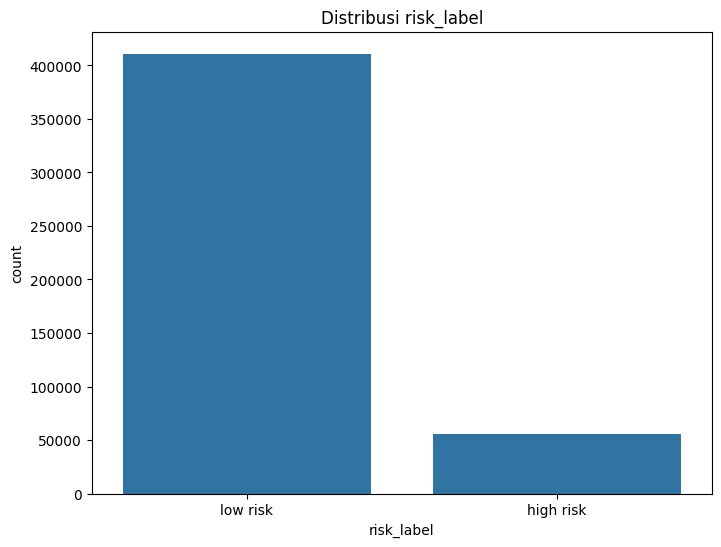

Distribusi risk_label:
 risk_label
low risk     410953
high risk     55332
Name: count, dtype: int64


In [ ]:
# 14. Visualisasi distribusi target
plt.figure(figsize=(8, 6))
sns.countplot(x='risk_label', data=df_clean)
plt.title("Distribusi risk_label")
plt.show()
print("Distribusi risk_label:\n", df_clean['risk_label'].value_counts())

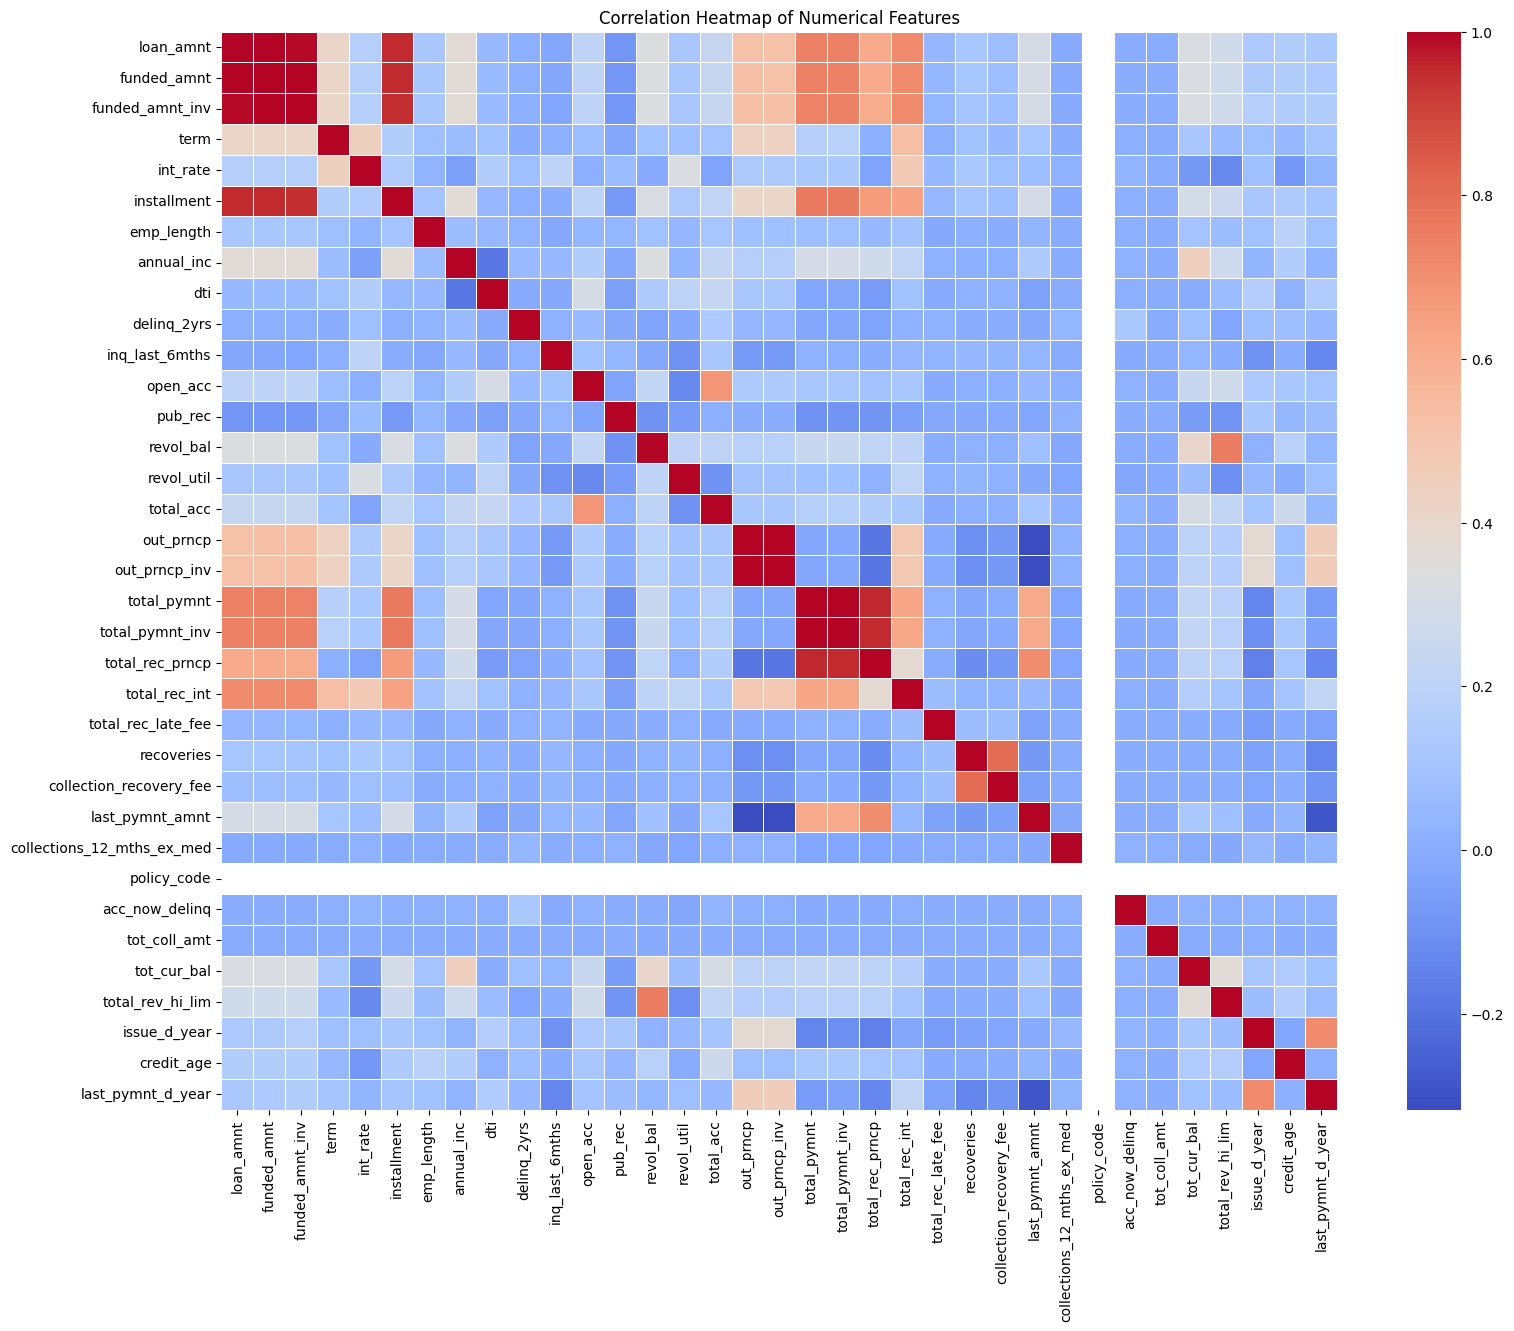

In [ ]:
# 15. Visualisasi korelasi (Heatmap)
plt.figure(figsize=(18, 14))
corr_matrix = df_clean.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [ ]:
# 16. Identifikasi fitur dengan korelasi tinggi terhadap target
if 'risk_label' in corr_matrix.columns:
    target_corr = corr_matrix['risk_label'].drop('risk_label')
    strong_corr_features = target_corr[abs(target_corr) > 0.7].sort_values(ascending=False)
    print("Fitur dengan korelasi kuat terhadap risk_label:\n", strong_corr_features)

In [ ]:
# 17. Hapus fitur dengan korelasi tinggi untuk mencegah multikolinearitas
corr_matrix_abs = corr_matrix.abs()
upper = corr_matrix_abs.where(np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
df_clean = df_clean.drop(columns=[col for col in to_drop if col in df_clean.columns and col != 'risk_label'])
print("Fitur yang dihapus karena multikolinearitas:", to_drop)
print("Shape setelah penghapusan fitur multikolinearitas:", df_clean.shape)

Fitur yang dihapus karena multikolinearitas: ['funded_amnt', 'funded_amnt_inv', 'installment', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'collection_recovery_fee', 'last_pymnt_amnt', 'total_rev_hi_lim', 'last_pymnt_d_year']
Shape setelah penghapusan fitur multikolinearitas: (466285, 125)


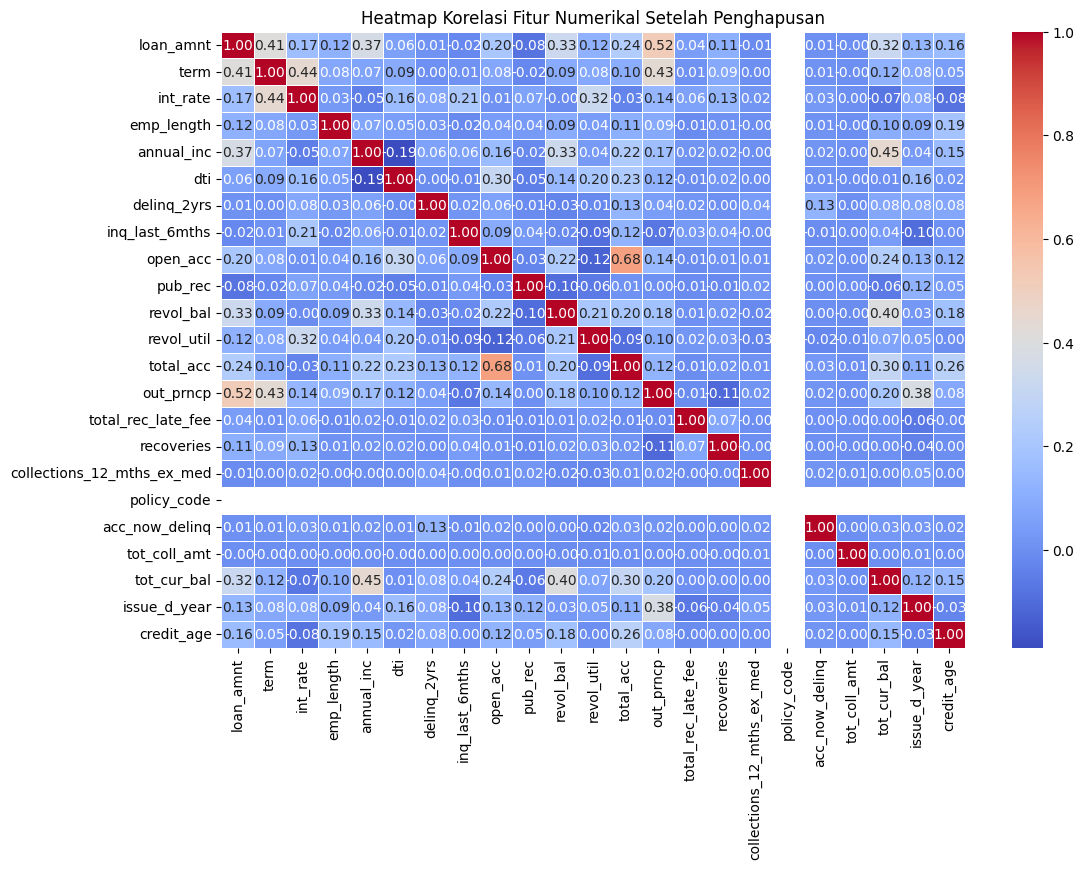

In [ ]:
# 18. Visualisasi korelasi setelah penghapusan
plt.figure(figsize=(12, 8))
corr_matrix = df_clean.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur Numerikal Setelah Penghapusan")
plt.show()

In [ ]:
columns_to_drop2 = [
    'open_acc',
    'policy_code'
]

df_clean = df_clean.drop(columns=columns_to_drop2)

# Cek bentuk data setelah penghapusan
print("Shape setelah penghapusan fitur:", df_clean.shape)

Shape setelah penghapusan fitur: (466285, 123)


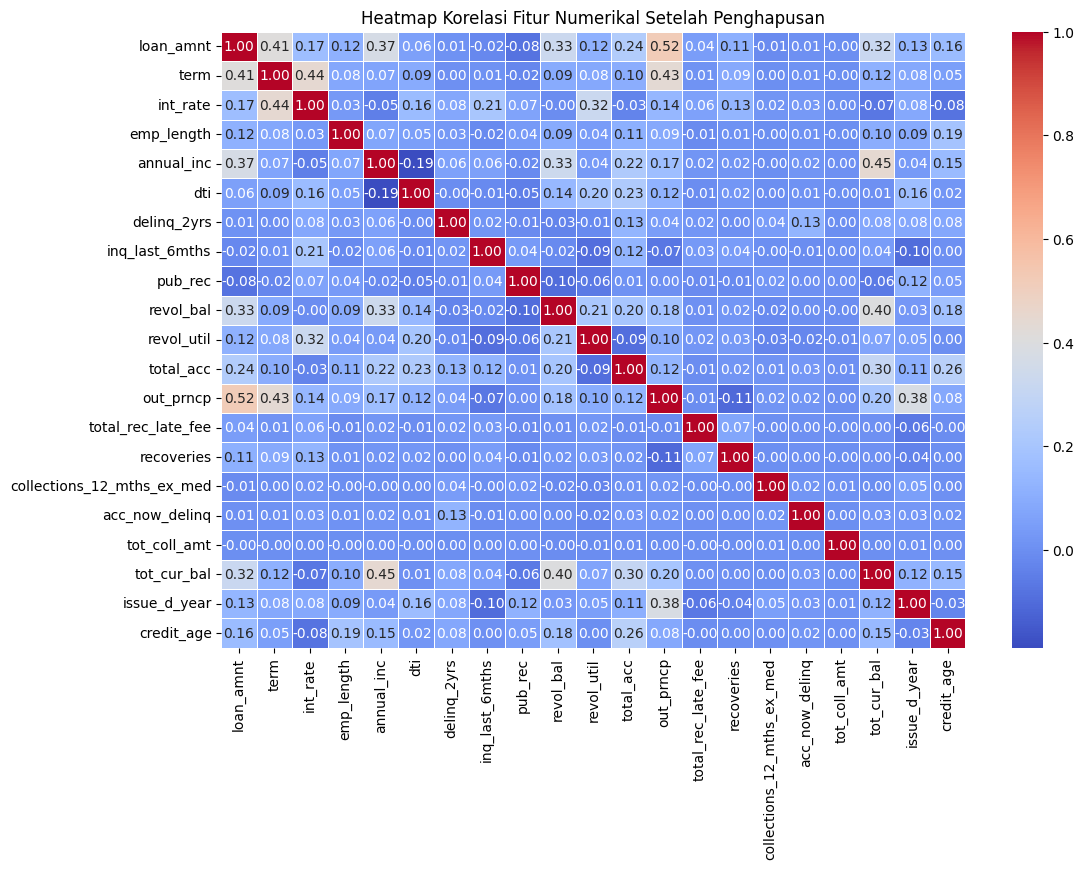

In [ ]:
# 18. Visualisasi korelasi setelah penghapusan
plt.figure(figsize=(12, 8))
corr_matrix = df_clean.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur Numerikal Setelah Penghapusan")
plt.show()

In [ ]:
# 19. Pisahkan fitur dan label
X = df_clean.drop(columns=['risk_label'])
y = df_clean['risk_label']

In [ ]:
# 20. Encode label jika diperlukan
le = LabelEncoder()
y_encoded = le.fit_transform(y)
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label mapping:", label_mapping)

Label mapping: {'high risk': np.int64(0), 'low risk': np.int64(1)}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score,
                             roc_auc_score, recall_score, precision_score, f1_score)

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scaling hanya untuk Logistic Regression
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi model
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Menyimpan hasil evaluasi
results = []

for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Gunakan data yang telah diskalakan hanya untuk Logistic Regression
    if model_name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_train_pred = model.predict(X_train_scaled)
        y_train_proba = model.predict_proba(X_train_scaled)[:, 1]
        y_test_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)
        y_train_proba = model.predict_proba(X_train)[:, 1]
        y_test_proba = model.predict_proba(X_test)[:, 1]

    # Evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    auc_train = roc_auc_score(y_train, y_train_proba)
    auc_test = roc_auc_score(y_test, y_test_proba)
    recall_train = recall_score(y_train, y_train_pred)
    recall_test = recall_score(y_test, y_pred)
    precision_train = precision_score(y_train, y_train_pred)
    precision_test = precision_score(y_test, y_pred)
    f1_train = f1_score(y_train, y_train_pred)
    f1_test = f1_score(y_test, y_pred)

    # Cross-validation AUC
    if model_name == 'Logistic Regression':
        cv_auc = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc').mean()
    else:
        cv_auc = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'AUC_train': auc_train,
        'AUC_test': auc_test,
        'Recall_train': recall_train,
        'Recall_test': recall_test,
        'Precision_train': precision_train,
        'Precision_test': precision_test,
        'F1_train': f1_train,
        'F1_test': f1_test,
        'CrossVal_AUC': cv_auc
    })

    # Tampilkan classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['high', 'low'], zero_division=1))
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print("=" * 60)

# Buat DataFrame hasil
results_df = pd.DataFrame(results)

# Highlight nilai terbaik
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: lightgreen' if v else '' for v in is_max]

styled_df = results_df.style.apply(highlight_max, subset=['Accuracy', 'AUC_train', 'AUC_test',
                                                          'Recall_train', 'Recall_test',
                                                          'Precision_train', 'Precision_test',
                                                          'F1_train', 'F1_test', 'CrossVal_AUC']) \
                            .format(precision=3) \
                            .set_caption('Model Comparison (Train, Test, and CrossVal)')

# Tampilkan tabel
display(styled_df)


Training Random Forest...

Classification Report:
              precision    recall  f1-score   support

        high       0.99      0.45      0.62     11080
         low       0.93      1.00      0.96     82177

    accuracy                           0.93     93257
   macro avg       0.96      0.73      0.79     93257
weighted avg       0.94      0.93      0.92     93257

Random Forest Accuracy: 0.9342
Training Logistic Regression...

Classification Report:
              precision    recall  f1-score   support

        high       0.96      0.29      0.44     11080
         low       0.91      1.00      0.95     82177

    accuracy                           0.91     93257
   macro avg       0.94      0.64      0.70     93257
weighted avg       0.92      0.91      0.89     93257

Logistic Regression Accuracy: 0.9141
Training Decision Tree...

Classification Report:
              precision    recall  f1-score   support

        high       0.51      0.55      0.53     11080
         low 

,Model,Accuracy,AUC_train,AUC_test,Recall_train,Recall_test,Precision_train,Precision_test,F1_train,F1_test,CrossVal_AUC
0,Random Forest,0.934,1.000,0.848,1.000,0.999,1.000,0.931,1.000,0.964,0.845
1,Logistic Regression,0.914,0.814,0.815,0.998,0.998,0.913,0.912,0.954,0.953,0.812
2,Decision Tree,0.883,1.000,0.737,1.000,0.929,1.000,0.938,1.000,0.933,0.733


In [ ]:
from sklearn.metrics import confusion_matrix

# Menampilkan Confusion Matrix dalam bentuk angka
for model_name, model in models.items():
    print(f"Confusion Matrix untuk {model_name}:")

    # Prediksi dengan data yang sesuai
    if model_name == 'Logistic Regression':
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)

    # Ambil nilai TN, FP, FN, TP
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    print(f"True Negative (TN): {tn}")
    print(f"False Positive (FP): {fp}")
    print(f"False Negative (FN): {fn}")
    print(f"True Positive (TP): {tp}")
    print("=" * 50)


Confusion Matrix untuk Random Forest:
True Negative (TN): 5012
False Positive (FP): 6068
False Negative (FN): 70
True Positive (TP): 82107
Confusion Matrix untuk Logistic Regression:
True Negative (TN): 3197
False Positive (FP): 7883
False Negative (FN): 131
True Positive (TP): 82046
Confusion Matrix untuk Decision Tree:
True Negative (TN): 6052
False Positive (FP): 5028
False Negative (FN): 5874
True Positive (TP): 76303


In [ ]:
X1 = df_clean.drop('risk_label', axis=1)
Y1 = df_clean['risk_label']

In [ ]:
# 20. Encode label jika diperlukan
le_over = LabelEncoder()
y_encoded_over = le_over.fit_transform(y)
label_mapping = dict(zip(le_over.classes_, le_over.transform(le_over.classes_)))
print("Label mapping:", label_mapping)

Label mapping: {'high risk': np.int64(0), 'low risk': np.int64(1)}


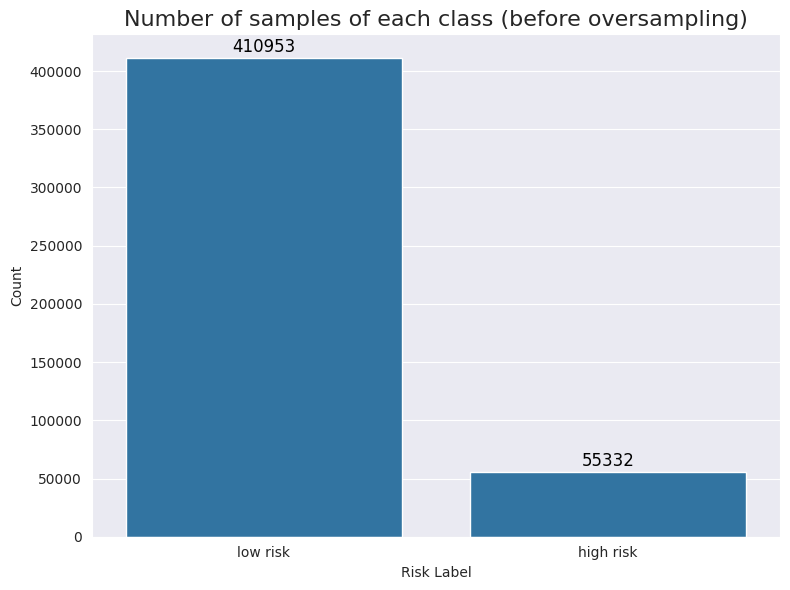

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style(style='darkgrid')

# Mengubah Y1 menjadi DataFrame jika belum
df_label = pd.DataFrame(Y1, columns=['risk_label'])

# Plot countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_label, x='risk_label')

# Menambahkan angka di atas tiap bar
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(str(count), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 8),
                textcoords='offset points')

plt.title('Number of samples of each class (before oversampling)', fontsize=16)
plt.xlabel('Risk Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [ ]:
pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE

# 23. Terapkan SMOTE sederhana pada data pelatihan
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_over, y_train_over = smote.fit_resample(X1, y_encoded_over)

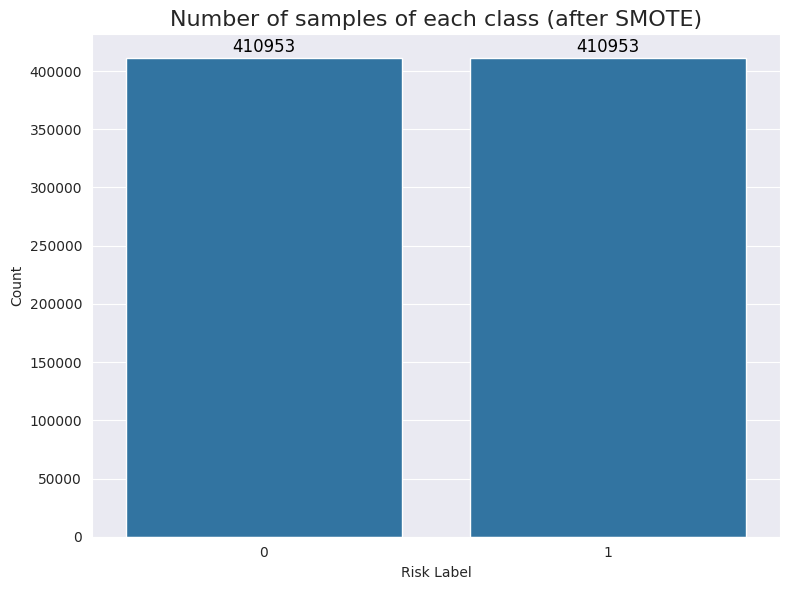

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Buat DataFrame dari y_over
y_over_df = pd.DataFrame(y_train_over, columns=['risk_label'])

# Plot countplot
plt.figure(figsize=(8, 6))
sns.set_style(style='darkgrid')
ax = sns.countplot(data=y_over_df, x='risk_label')

# Tambahkan label jumlah di atas tiap bar
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(str(count), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 8),
                textcoords='offset points')

plt.title('Number of samples of each class (after SMOTE)', fontsize=16)
plt.xlabel('Risk Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Split data hasil oversampling
X_train_over, X_test_over, Y_train_over, Y_test_over = train_test_split(X_train_over, y_train_over, test_size=0.2, random_state=42)

# Scaling untuk Logistic Regression
scaler = MinMaxScaler()
X_train_scaled_over = scaler.fit_transform(X_train_over)
X_test_scaled_over = scaler.transform(X_test_over)

In [ ]:
# Inisialisasi model
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Menyimpan hasil evaluasi
results = []

for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Gunakan data yang telah diskalakan hanya untuk Logistic Regression
    if model_name == 'Logistic Regression':
        model.fit(X_train_scaled_over, Y_train_over)
        Y_pred = model.predict(X_test_scaled_over)
        Y_train_pred = model.predict(X_train_scaled_over)
        Y_train_proba = model.predict_proba(X_train_scaled_over)[:, 1]
        Y_test_proba = model.predict_proba(X_test_scaled_over)[:, 1]
    else:
        model.fit(X_train_over, Y_train_over)
        Y_pred = model.predict(X_test_over)
        Y_train_pred = model.predict(X_train_over)
        Y_train_proba = model.predict_proba(X_train_over)[:, 1]
        Y_test_proba = model.predict_proba(X_test_over)[:, 1]

    # Evaluasi metrik
    accuracy = accuracy_score(Y_test_over, Y_pred)
    auc_train = roc_auc_score(Y_train_over, Y_train_proba)
    auc_test = roc_auc_score(Y_test_over, Y_test_proba)
    recall_train = recall_score(Y_train_over, Y_train_pred)
    recall_test = recall_score(Y_test_over, Y_pred)
    precision_train = precision_score(Y_train_over, Y_train_pred)
    precision_test = precision_score(Y_test_over, Y_pred)
    f1_train = f1_score(Y_train_over, Y_train_pred)
    f1_test = f1_score(Y_test_over, Y_pred)

    # Cross-validation AUC
    if model_name == 'Logistic Regression':
        cv_auc = cross_val_score(model, X_train_scaled_over, Y_train_over, cv=3, scoring='roc_auc').mean()
    else:
        cv_auc = cross_val_score(model, X_train_over, Y_train_over, cv=3, scoring='roc_auc').mean()

    # Simpan hasil evaluasi
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'AUC_train': auc_train,
        'AUC_test': auc_test,
        'Recall_train': recall_train,
        'Recall_test': recall_test,
        'Precision_train': precision_train,
        'Precision_test': precision_test,
        'F1_train': f1_train,
        'F1_test': f1_test,
        'CrossVal_AUC': cv_auc
    })

    # Tampilkan classification report
    print("\nClassification Report:")
    print(classification_report(Y_test_over, Y_pred, target_names=['high', 'low'], zero_division=1))
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print("=" * 60)

# Buat DataFrame hasil
results_df = pd.DataFrame(results)

# Highlight nilai terbaik
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: lightgreen' if v else '' for v in is_max]

styled_df = results_df.style.apply(highlight_max, subset=['Accuracy', 'AUC_train', 'AUC_test',
                                                          'Recall_train', 'Recall_test',
                                                          'Precision_train', 'Precision_test',
                                                          'F1_train', 'F1_test', 'CrossVal_AUC']) \
                            .format(precision=3) \
                            .set_caption('Model Comparison (Train, Test, and CrossVal)')

# Tampilkan tabel
display(styled_df)

Training Random Forest...

Classification Report:
              precision    recall  f1-score   support

        high       0.99      0.93      0.96     81995
         low       0.93      1.00      0.96     82387

    accuracy                           0.96    164382
   macro avg       0.96      0.96      0.96    164382
weighted avg       0.96      0.96      0.96    164382

Random Forest Accuracy: 0.9613
Training Logistic Regression...

Classification Report:
              precision    recall  f1-score   support

        high       1.00      0.90      0.95     81995
         low       0.91      1.00      0.95     82387

    accuracy                           0.95    164382
   macro avg       0.95      0.95      0.95    164382
weighted avg       0.95      0.95      0.95    164382

Logistic Regression Accuracy: 0.9501
Training Decision Tree...

Classification Report:
              precision    recall  f1-score   support

        high       0.92      0.93      0.93     81995
         low 

,Model,Accuracy,AUC_train,AUC_test,Recall_train,Recall_test,Precision_train,Precision_test,F1_train,F1_test,CrossVal_AUC
0,Random Forest,0.961,1.000,0.983,1.000,0.995,1.000,0.932,1.000,0.963,0.982
1,Logistic Regression,0.950,0.974,0.974,0.997,0.997,0.912,0.911,0.953,0.952,0.974
2,Decision Tree,0.927,1.000,0.927,1.000,0.921,1.000,0.932,1.000,0.927,0.925


In [ ]:
from sklearn.metrics import confusion_matrix

# Menampilkan Confusion Matrix sebagai angka saja
for model_name, model in models.items():
    print(f"Confusion Matrix untuk {model_name}:")

    # Prediksi menggunakan data test yang sesuai
    if model_name == 'Logistic Regression':
        Y_pred = model.predict(X_test_scaled_over)
    else:
        Y_pred = model.predict(X_test_over)

    # Buat dan tampilkan confusion matrix
    cm = confusion_matrix(Y_test_over, Y_pred)
    print(cm)
    print()  # Untuk jarak antar output


Confusion Matrix untuk Random Forest:
[[76052  5943]
 [  411 81976]]

Confusion Matrix untuk Logistic Regression:
[[74006  7989]
 [  219 82168]]

Confusion Matrix untuk Decision Tree:
[[76476  5519]
 [ 6477 75910]]



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Definisi parameter
param_dist = {
    'n_estimators': randint(100, 200),  # Rentang yang lebih luas
    'max_depth': [10, 20, 30, None],    # Batasi kedalaman
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_leaf_nodes': [None, 50, 100]   # Tambah batasan daun
}

rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,  # Tingkatkan untuk eksplorasi lebih baik
    cv=3,
    scoring='roc_auc',
    verbose=2,
    random_state=42,
    n_jobs=-1  # Manfaatkan 6 core/12 thread
)

# Fit model
random_search.fit(X_train_over, Y_train_over)

# Ambil model terbaik
best_rf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'max_depth': 30, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 13, 'n_estimators': 129}


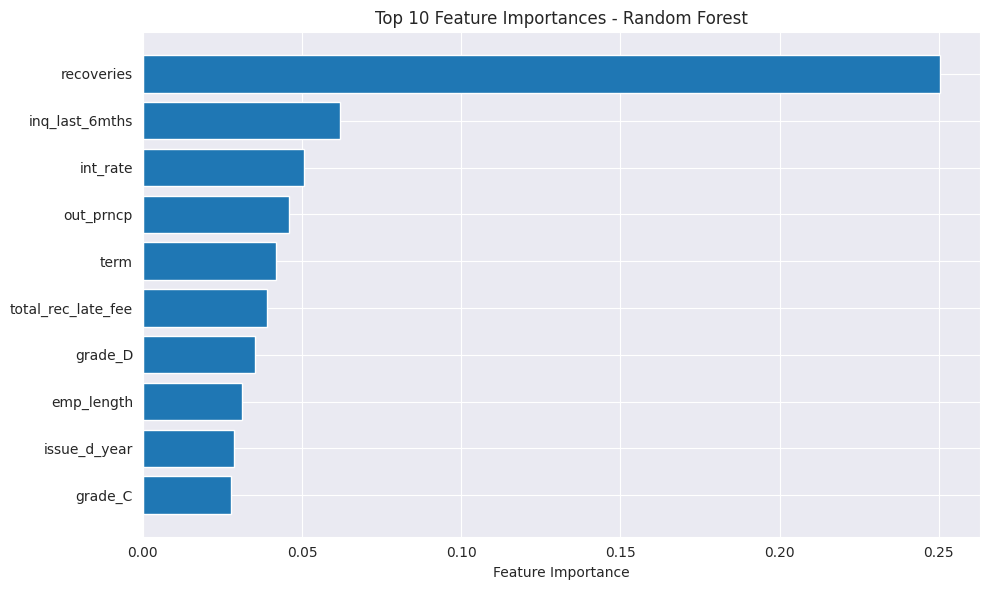

In [ ]:
importances = best_rf.feature_importances_
feature_names = X_train_over.columns
feat_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

# Ambil 10 fitur teratas
top_10_features = feat_importance_df.head(10)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel("Feature Importance")
plt.title("Top 10 Feature Importances - Random Forest")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
import joblib

# Simpan model hasil tuning
joblib.dump(best_rf, 'best_random_forest_model.pkl')

# Simpan juga scaler-nya supaya bisa dipakai untuk prediksi data baru
joblib.dump(scaler, 'scaler.pkl')

print("Model dan scaler berhasil disimpan.")


Model dan scaler berhasil disimpan.


In [ ]:
import joblib
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, classification_report

# Load model dan scaler
rf_model = joblib.load('best_random_forest_model.pkl')
scaler = joblib.load('scaler.pkl')

# Transformasi data oversampling dengan scaler
X_train_scaled_over = scaler.transform(X_train_over)
X_test_scaled_over = scaler.transform(X_test_over)

# Prediksi
Y_pred_test = rf_model.predict(X_test_over)  # model dilatih tanpa scaling, jadi pakai data asli (X_test_over)
Y_pred_train = rf_model.predict(X_train_over)
Y_test_proba = rf_model.predict_proba(X_test_over)[:, 1]
Y_train_proba = rf_model.predict_proba(X_train_over)[:, 1]

# Evaluasi metrik
accuracy = accuracy_score(Y_test_over, Y_pred_test)
auc_train = roc_auc_score(Y_train_over, Y_train_proba)
auc_test = roc_auc_score(Y_test_over, Y_test_proba)
recall_train = recall_score(Y_train_over, Y_pred_train)
recall_test = recall_score(Y_test_over, Y_pred_test)
precision_train = precision_score(Y_train_over, Y_pred_train)
precision_test = precision_score(Y_test_over, Y_pred_test)
f1_train = f1_score(Y_train_over, Y_pred_train)
f1_test = f1_score(Y_test_over, Y_pred_test)

# Tampilkan classification report
print("=== Classification Report (Test Data) ===")
print(classification_report(Y_test_over, Y_pred_test, target_names=["high", "low"], zero_division=1))

# Tampilkan ringkasan metrik
print("\n=== Evaluation Metrics ===")
print(f"Accuracy         : {accuracy:.4f}")
print(f"AUC Train        : {auc_train:.4f}")
print(f"AUC Test         : {auc_test:.4f}")
print(f"Recall Train     : {recall_train:.4f}")
print(f"Recall Test      : {recall_test:.4f}")
print(f"Precision Train  : {precision_train:.4f}")
print(f"Precision Test   : {precision_test:.4f}")
print(f"F1 Score Train   : {f1_train:.4f}")
print(f"F1 Score Test    : {f1_test:.4f}")


=== Classification Report (Test Data) ===
              precision    recall  f1-score   support

        high       1.00      0.92      0.96     81995
         low       0.92      1.00      0.96     82387

    accuracy                           0.96    164382
   macro avg       0.96      0.96      0.96    164382
weighted avg       0.96      0.96      0.96    164382


=== Evaluation Metrics ===
Accuracy         : 0.9572
AUC Train        : 0.9938
AUC Test         : 0.9807
Recall Train     : 0.9994
Recall Test      : 0.9961
Precision Train  : 0.9319
Precision Test   : 0.9244
F1 Score Train   : 0.9645
F1 Score Test    : 0.9589


Training and Evaluating Tuned Random Forest on Original Data...


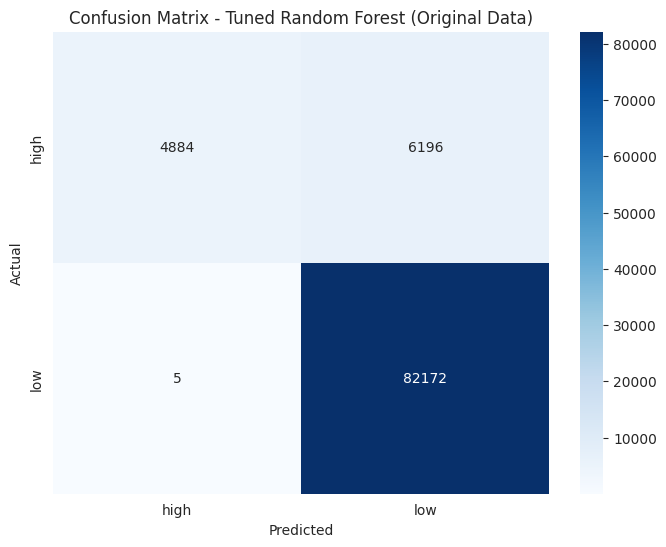

Confusion Matrix:
 [[ 4884  6196]
 [    5 82172]]

Classification Report:
              precision    recall  f1-score   support

        high       1.00      0.44      0.61     11080
         low       0.93      1.00      0.96     82177

    accuracy                           0.93     93257
   macro avg       0.96      0.72      0.79     93257
weighted avg       0.94      0.93      0.92     93257

Tuned Random Forest Accuracy: 0.9335


,Model,Accuracy,AUC_train,AUC_test,Recall_train,Recall_test,Precision_train,Precision_test,F1_train,F1_test,CrossVal_AUC
0,Tuned Random Forest,0.934,0.977,0.852,1.000,1.000,0.932,0.930,0.965,0.964,0.850


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score,
                             roc_auc_score, recall_score, precision_score, f1_score)
import seaborn as sns
import matplotlib.pyplot as plt

# Split data awal (sebelum SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest dengan parameter terbaik dari RandomizedSearchCV
best_params = {
    'max_depth': 30,
    'max_features': 'log2',
    'min_samples_leaf': 2,
    'min_samples_split': 13,
    'n_estimators': 129
}
best_rf = RandomForestClassifier(**best_params, random_state=42)

# Inisialisasi hasil
results = []

# Latih dan evaluasi model
model_name = 'Tuned Random Forest'
print(f"Training and Evaluating {model_name} on Original Data...")

# Latih model
best_rf.fit(X_train, y_train)

# Prediksi
y_pred = best_rf.predict(X_test)
y_train_pred = best_rf.predict(X_train)
y_train_proba = best_rf.predict_proba(X_train)[:, 1]
y_test_proba = best_rf.predict_proba(X_test)[:, 1]

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
auc_train = roc_auc_score(y_train, y_train_proba)
auc_test = roc_auc_score(y_test, y_test_proba)
recall_train = recall_score(y_train, y_train_pred)
recall_test = recall_score(y_test, y_pred)
precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_pred)
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_pred)

# Cross-validation AUC
cv_auc = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='roc_auc').mean()

# Simpan hasil
results.append({
    'Model': model_name,
    'Accuracy': accuracy,
    'AUC_train': auc_train,
    'AUC_test': auc_test,
    'Recall_train': recall_train,
    'Recall_test': recall_test,
    'Precision_train': precision_train,
    'Precision_test': precision_test,
    'F1_train': f1_train,
    'F1_test': f1_test,
    'CrossVal_AUC': cv_auc
})

# Tampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['high', 'low'],
            yticklabels=['high', 'low'])
plt.title('Confusion Matrix - Tuned Random Forest (Original Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Confusion Matrix:\n", cm)

# Tampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['high', 'low'], zero_division=1))
print(f"{model_name} Accuracy: {accuracy:.4f}")
print("=" * 60)

# Buat DataFrame hasil
results_df = pd.DataFrame(results)

# Format dan tampilkan tabel
styled_df = results_df.style.format(precision=3) \
                           .set_caption('Tuned Random Forest Evaluation (Original Data)')
display(styled_df)
